In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('base_treinamento_testes.pkl')
df

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga,aprovado_vaga
4146,-5433147389500583028,0.0,INDUSTRIAL TRAINEE,ENGENHARIA QUIMICA,JUNIOR/TRAINEE,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SALVADOR,2.0,1.0,6.450,0.000,6.250,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4147,-5433147389500583028,1500.0,DESENVOLVIMENTO ENGENHEIRO PRO,ADMINISTRACAO DE EMPRESAS,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,1.0,8.000,0.000,7.990,8.20,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4148,-5433147389500583028,2050.0,CLIENTE ESTAGIO QUALIDADE,ENGENHARIA DE PRODUCAO,ESTAGIO,FORMACAO SUPERIOR COMPLETA,ARUJA,2.0,0.0,3.875,0.000,5.330,5.40,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4149,-5433147389500583028,0.0,CONTA EXECUTIVO PARCERIA,MARKETING,JUNIOR/TRAINEE,FORMACAO SUPERIOR COMPLETA,SAO PAULO,3.0,0.0,7.250,0.000,7.990,6.25,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
4150,-5433147389500583028,1890.0,CICLO PDCA,MARKETING,AUXILIAR/OPERACIONAL,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,3.0,4.0,5.250,6.375,6.650,7.00,PROGRAMA TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52273,-408011488522086617,0.0,ADMINISTRATIVO EMPLEADO,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),BUENOS AIRES,0.0,0.0,0.000,0.000,0.000,9.20,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52274,-408011488522086617,0.0,NAO CLASSIFICADO,None,None,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,BOGOTA,0.0,0.0,0.000,0.000,0.000,6.60,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52275,-408011488522086617,1300.0,ESTAGIO MANUTENCAO,ENGENHARIA - OUTRAS,ESTAGIO,FORMACAO SUPERIOR COMPLETA,SALVADOR,4.0,0.0,9.750,0.000,7.675,8.20,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0
52276,-408011488522086617,0.0,COMERCIAL EXECUTIVO,None,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR (CURSANDO),ZARATE,0.0,0.0,0.000,0.000,0.000,6.50,TRAINEE,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None,0


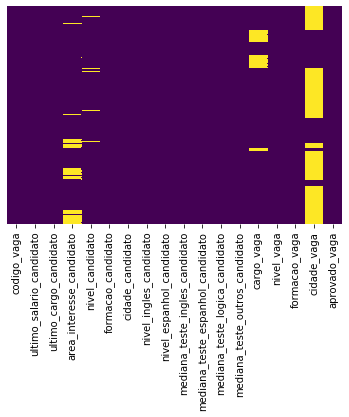

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Tratamento dos valores faltantes

Algumas variáveis poosuem muitos dados faltantes. A varivável cidade_vaga será excluída do modelo, pois 0,06669 das vagas não possuem a cidade listada. Ou seja 2/3 desses dados não estão contidos. São muitos dados para "preencher", e isso poderá enviessar o nosso modelo. 


In [4]:
del df['cidade_vaga']

In [5]:
df.isnull().sum()

codigo_vaga                            0
ultimo_salario_candidato               0
ultimo_cargo_candidato                 0
area_interesse_candidato            3820
nivel_candidato                      599
formacao_candidato                     0
cidade_candidato                       6
nivel_ingles_candidato                 0
nivel_espanhol_candidato               0
mediana_teste_ingles_candidato         0
mediana_teste_espanhol_candidato       0
mediana_teste_logica_candidato         0
mediana_teste_outros_candidato         0
cargo_vaga                          3207
nivel_vaga                             0
formacao_vaga                          0
aprovado_vaga                          0
dtype: int64

In [6]:
pd.value_counts(df['cidade_candidato'])

SAO PAULO         6319
RIO DE JANEIRO    1919
BELO HORIZONTE    1114
CAMPINAS           891
BUENOS AIRES       751
                  ... 
PLAYA CORONADO       1
SARRIA               1
CARAMBEI             1
PEDRAS GRANDES       1
MATURIN              1
Name: cidade_candidato, Length: 1278, dtype: int64

In [7]:
#Como 24,58% dos candidatos, ou seja para cada 4 candidatos um é de SP, inferimos que nesse caso, os 6 valores ausentes também é de SP.
df['cidade_candidato'].fillna('SAO PAULO', inplace=True)

In [9]:
df['nivel_candidato'].value_counts()

JUNIOR/TRAINEE            6703
ESTAGIO                   6308
PLENO                     4609
AUXILIAR/OPERACIONAL      2560
SUPERVISAO/COORDENACAO    2071
TECNICO                    884
SENIOR                     849
GERENCIA                   804
DIRETORIA                  312
Name: nivel_candidato, dtype: int64

In [10]:
df['nivel_candidato'].fillna('JUNIOR/TRAINEE', inplace=True)

In [11]:
df['cargo_vaga'].value_counts()

PROGRAMA TRAINEE             16236
GERENTE LOJA SUPERMERCADO     1835
INTERNACIONAL TRAINEE         1753
TELECOMUNICACAO TRAINEE       1218
COMERCIAL                      734
PROGRAMMER                     440
TRAINEE                        276
Name: cargo_vaga, dtype: int64

In [12]:
df['cargo_vaga'].fillna('PROGRAMA TRAINEE', inplace=True)

In [13]:
del df['area_interesse_candidato']

In [101]:
del df['nivel_candidato']
del df['cidade_candidato']

<b> Agora que conhecemos os nossos dados faltantes, sabemos que a maioria é dos candidatos é da cidade de São Paulo. Possuí ensino superior completo, maioria dos nível dos candidatos já foram trainee ou estagiários que estão na sua ampla maioria buscando um emprego ou recolocação como trainee. 

Com base nisso, podemos transformar essas variáveis categóricas em numéricas e atribuir um valor para cada uma dessas variáveis<b/>.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25699 entries, 4146 to 52277
Data columns (total 16 columns):
codigo_vaga                         25699 non-null int64
ultimo_salario_candidato            25699 non-null float64
ultimo_cargo_candidato              25699 non-null object
nivel_candidato                     25699 non-null object
formacao_candidato                  25699 non-null object
cidade_candidato                    25699 non-null object
nivel_ingles_candidato              25699 non-null float64
nivel_espanhol_candidato            25699 non-null float64
mediana_teste_ingles_candidato      25699 non-null float64
mediana_teste_espanhol_candidato    25699 non-null float64
mediana_teste_logica_candidato      25699 non-null float64
mediana_teste_outros_candidato      25699 non-null float64
cargo_vaga                          25699 non-null object
nivel_vaga                          25699 non-null object
formacao_vaga                       25699 non-null object
aprovado_vag

In [16]:
df.ultimo_cargo_candidato = df.ultimo_cargo_candidato.astype('category')
df.nivel_candidato = df.nivel_candidato.astype('category')
df.nivel_vaga = df.nivel_vaga.astype('category')
df.formacao_vaga = df.formacao_vaga.astype('category')
df.codigo_vaga = df.codigo_vaga.astype('int32')
df.aprovado_vaga = df.aprovado_vaga.astype('int32')

Aplicamos essa técnica para diminuir diminuir o tamanho do arquivo. Dessa forma conseguimos economizar 17% da nossa memória do computador. Em grandes quantidades de dados essa é uma técnica que pode ser utilizada. 

Primeiramente vamos transformar todas as variáveis categóricas em valores númericos (incluindo os valores faltantes). Depois iremos preencher com valores numéricos esses dados faltantes que foram transformados. 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25699 entries, 4146 to 52277
Data columns (total 16 columns):
codigo_vaga                         25699 non-null int32
ultimo_salario_candidato            25699 non-null float64
ultimo_cargo_candidato              25699 non-null category
nivel_candidato                     25699 non-null category
formacao_candidato                  25699 non-null object
cidade_candidato                    25699 non-null object
nivel_ingles_candidato              25699 non-null float64
nivel_espanhol_candidato            25699 non-null float64
mediana_teste_ingles_candidato      25699 non-null float64
mediana_teste_espanhol_candidato    25699 non-null float64
mediana_teste_logica_candidato      25699 non-null float64
mediana_teste_outros_candidato      25699 non-null float64
cargo_vaga                          25699 non-null object
nivel_vaga                          25699 non-null category
formacao_vaga                       25699 non-null category
apro

In [19]:
ucc = df['ultimo_cargo_candidato']
set(ucc)


{'',
 'CONTROLADORIA ESTAGIO',
 'PROPAGANDISTA TRAINEE',
 'ANALISTA CIEX COMERCIAL',
 'DESARROLLO EN PROFESIONISTA',
 'AGRICOLA SUPERVISOR VENDA',
 'AUTOMACAO MONTADOR PAINEL TECN',
 'SIM',
 'PROGRAMADOR TRAINEE',
 'ANALISTA MARKETING TRADE',
 'COMPRA DIREITO ESTAGIO MATERIA',
 'ATENDIMENTO CLIENTE',
 'ADMINISTRATIVO ASSISTENTE EDUC',
 'ENGENHEIRO MECANICO RESPONSAVE',
 'AUDITOR CORPORATE',
 'BUSINESS COORDENADOR HR PARTNE',
 'ESTAGIO FRIO GESTAO LAMINACAO ',
 'COMPRA ESTAGIO SUPRIMENTO',
 'INGENIERO SEMI',
 'COORDENADOR MANUTENCAO MECAN O',
 'ASSISTENTE COMERCIO EXTERIOR',
 'CIVIL ENGENHEIRO RESIDENTE',
 'ANALISTA DIGITAL EVENTO MARKET',
 'ADMISIONES DIRETOR FINANCIAMEN',
 'ELETRICO INGENIERIA',
 'ESTAGIO VOLUNTARIO',
 'ADMINISTRATIVO APRENDIZ',
 'COMERCIO GERENTE',
 'EQUITY INTERNO SALES TRADE',
 'ESTAGIO JOB SUMMER',
 'ANALYST DEMANDA PLANNING SUPPL',
 'ANALISTA SOLUCAO TI',
 'DISTRIBUICAO GRUPO RESPONSAVEL',
 'INDUSTRIAL TECNOLOGIA TRAINEE',
 'ANALISTA CRM MARKETING',
 'PROJETO TRA

In [20]:
label_encoder = LabelEncoder()
UCC = label_encoder.fit_transform(ucc)
UCC
df['ultimo_cargo_candidato'] = UCC

In [21]:
fc = df['formacao_candidato']
set(fc)


{'ENSINO FUNDAMENTAL (1O. GRAU) INTERROMPIDO',
 'ENSINO MEDIO (2O. GRAU) COMPLETO',
 'ENSINO MEDIO (2O. GRAU) PROFISSIONALIZANTE COMPLETO',
 'FORMACAO SUPERIOR (CURSANDO)',
 'FORMACAO SUPERIOR COMPLETA',
 'FORMACAO SUPERIOR INTERROMPIDA',
 'POS-GRADUACAO NO NIVEL DOUTORADO',
 'POS-GRADUACAO NO NIVEL ESPECIALIZACAO',
 'POS-GRADUACAO NO NIVEL MESTRADO'}

In [22]:
label_encoder = LabelEncoder()
FC = label_encoder.fit_transform(fc)
FC
df['formacao_candidato'] = FC

In [23]:
df['formacao_candidato']

4146     7
4147     4
4148     4
4149     4
4150     7
        ..
52273    3
52274    7
52275    4
52276    3
52277    4
Name: formacao_candidato, Length: 25699, dtype: int64

In [24]:
nv = df['nivel_vaga']
set(nv)


{'JUNIOR/TRAINEE'}

In [25]:
label_encoder = LabelEncoder()
NV = label_encoder.fit_transform(nv)
NV
df['nivel_vaga'] = NV

In [26]:
fv = df['formacao_vaga']
set(fv)


{'FORMACAO SUPERIOR (CURSANDO)', 'FORMACAO SUPERIOR COMPLETA'}

In [27]:
label_encoder = LabelEncoder()
FV = label_encoder.fit_transform(fv)
FV
df['formacao_vaga'] = FV

In [28]:
cv = df['cargo_vaga']
set(cv)


{'COMERCIAL',
 'GERENTE LOJA SUPERMERCADO',
 'INTERNACIONAL TRAINEE',
 'PROGRAMA TRAINEE',
 'PROGRAMMER',
 'TELECOMUNICACAO TRAINEE',
 'TRAINEE'}

In [29]:
label_encoder = LabelEncoder()
CV = label_encoder.fit_transform(cv)
CV
df['cargo_vaga'] = CV

In [30]:
df['cargo_vaga'].value_counts()

3    19443
1     1835
2     1753
5     1218
0      734
4      440
6      276
Name: cargo_vaga, dtype: int64

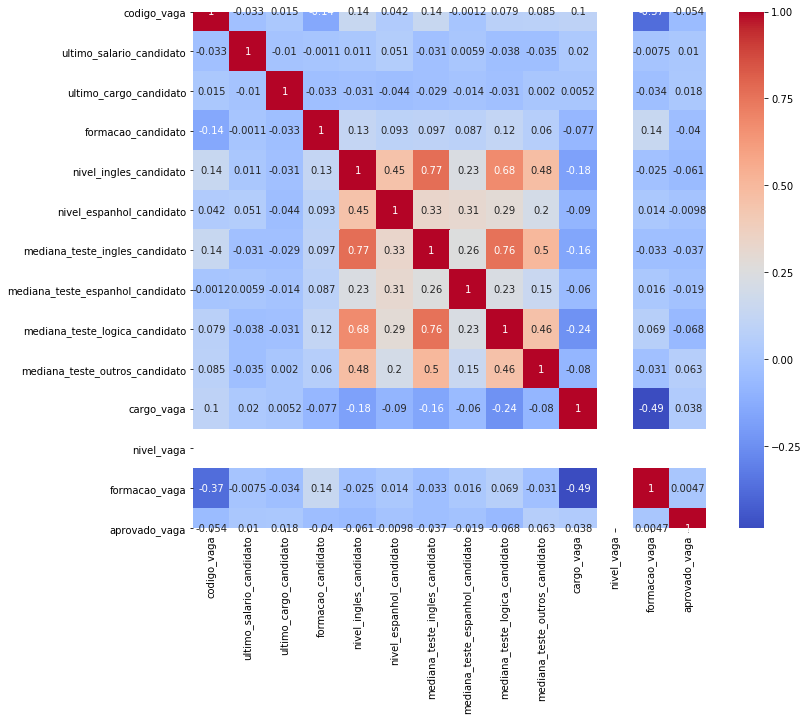

In [35]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.rcParams['figure.figsize'] = (9.5, 7.5)

Interessante notar que quem disse ter um bom nível de inglês, parece que realmente tem um bom nível de inglês tem uma facilidade para lógica. Já os candidatos que dizem saber espanhol, parece que nem todos tem um bom domínio de do idioma espanhol e tiveram resultados piores em lógica comparando com o inglês. 

Já a variável alvo que é a aprovado vaga, parece que não tem nenhuma correlação forte com nenhuma das variáveis que serão testadas. O que é bom, pois diminuí a chance de multicolinealidade nos dados. 

Outro ponto interessante, que apesar da correlação dos dados serem baixas, nivel de inglês, mediana do teste de lógica e a mediana de teste outros candidatos tem uma maior correlação em ser aprovado. 


In [40]:
from sklearn.model_selection import train_test_split

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25699 entries, 4146 to 52277
Data columns (total 16 columns):
codigo_vaga                         25699 non-null int32
ultimo_salario_candidato            25699 non-null float64
ultimo_cargo_candidato              25699 non-null int64
nivel_candidato                     25699 non-null category
formacao_candidato                  25699 non-null int64
cidade_candidato                    25699 non-null object
nivel_ingles_candidato              25699 non-null float64
nivel_espanhol_candidato            25699 non-null float64
mediana_teste_ingles_candidato      25699 non-null float64
mediana_teste_espanhol_candidato    25699 non-null float64
mediana_teste_logica_candidato      25699 non-null float64
mediana_teste_outros_candidato      25699 non-null float64
cargo_vaga                          25699 non-null int64
nivel_vaga                          25699 non-null int64
formacao_vaga                       25699 non-null int64
aprovado_vaga  

In [103]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('aprovado_vaga',axis=1), 
                                                    df['aprovado_vaga'], test_size=0.30, 
                                                    random_state=101)

In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/home/felipe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [106]:
logmodel.score(X_train, y_train)

0.8875423870142866

In [107]:
pred1 = logmodel.predict(X_test)

## Avaliação Modelo Logístico

In [108]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(classification_report(y_test,pred1))
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6923
           1       0.08      0.01      0.02       787

    accuracy                           0.88      7710
   macro avg       0.49      0.50      0.48      7710
weighted avg       0.81      0.88      0.84      7710

[[6802  121]
 [ 776   11]]


## Model KNN

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
scaler.fit(df.drop('aprovado_vaga',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [114]:
scaled_features = scaler.transform(df.drop('aprovado_vaga',axis=1))

In [115]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['aprovado_vaga'],
                                                    test_size=0.50, random_state=101)

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
knn = KNeighborsClassifier(n_neighbors=6)

In [128]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [129]:
knn.score(X_train, y_train)

0.9090201572106779

In [130]:
pred2 = knn.predict(X_test)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix

In [132]:
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     11579
           1       0.45      0.04      0.08      1271

    accuracy                           0.90     12850
   macro avg       0.67      0.52      0.51     12850
weighted avg       0.86      0.90      0.86     12850

[[11508    71]
 [ 1214    57]]


In [133]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

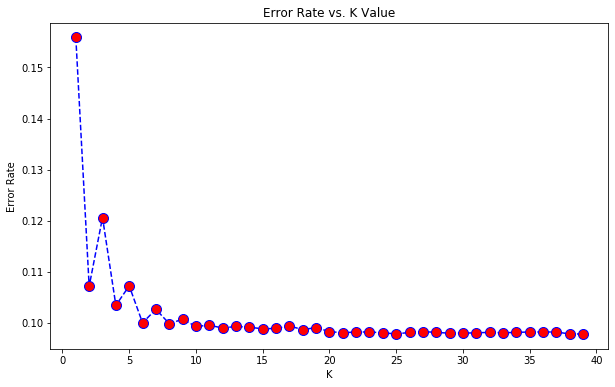

In [134]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [55]:
dfs = pd.read_pickle('base_submission.pkl')
dfs

,codigo_vaga,ultimo_salario_candidato,ultimo_cargo_candidato,area_interesse_candidato,nivel_candidato,formacao_candidato,cidade_candidato,nivel_ingles_candidato,nivel_espanhol_candidato,mediana_teste_ingles_candidato,mediana_teste_espanhol_candidato,mediana_teste_logica_candidato,mediana_teste_outros_candidato,cargo_vaga,nivel_vaga,formacao_vaga,cidade_vaga
0,-5432475023076753918,9100.0,GLOBAL TRAINEE,ENGENHARIA DE PRODUCAO,PLENO,FORMACAO SUPERIOR COMPLETA,SAO PAULO,4.0,0.0,7.000,0.00,7.335,7.00,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
1,-5432475023076753918,7653.0,TRADE,COMPRAS,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,RIO DE JANEIRO,4.0,3.0,8.000,7.50,6.670,7.00,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
2,-5432475023076753918,1978.0,CONTROLADOR PRODUCAO,ENGENHARIA MECANICA,TECNICO,FORMACAO SUPERIOR COMPLETA,CACAPAVA,3.0,0.0,4.750,6.75,7.340,7.40,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
3,-5432475023076753918,0.0,CONSULTOR EMPRESARIAL,SUPRIMENTOS,SENIOR,FORMACAO SUPERIOR COMPLETA,CURITIBA,4.0,1.0,8.000,0.00,7.500,8.50,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
4,-5432475023076753918,2100.0,INFORMATICA REDE TECNICO,TELECOMUNICACOES,TECNICO,FORMACAO SUPERIOR COMPLETA,FEIRA DE SANTANA,1.0,0.0,3.010,3.25,3.330,4.00,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),PARANAGUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47101,-6387918047679571035,1170.0,ESTAGIO,ENGENHARIA MECANICA,ESTAGIO,POS-GRADUACAO NO NIVEL MESTRADO,BELO HORIZONTE,3.0,0.0,7.000,2.75,8.000,7.75,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
47102,-6387918047679571035,2300.0,ACADEMICO AUXILIAR FINANCEIRO,ATEND. A CLIENTE,AUXILIAR/OPERACIONAL,FORMACAO SUPERIOR (CURSANDO),SAO PAULO,2.0,1.0,4.375,4.00,5.990,4.00,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
47103,-6387918047679571035,7500.0,CONSULTANT,MATEMATICA/ESTATISTICA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SUZANO,2.0,0.0,4.250,0.00,4.650,8.00,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None
47104,-6387918047679571035,3000.0,FARMACEUTICO,FARMACIA,SENIOR,POS-GRADUACAO NO NIVEL ESPECIALIZACAO,SAO PAULO,2.0,1.0,3.000,0.00,5.500,3.90,None,JUNIOR/TRAINEE,FORMACAO SUPERIOR (CURSANDO),None


In [56]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26579 entries, 0 to 47105
Data columns (total 17 columns):
codigo_vaga                         26579 non-null int64
ultimo_salario_candidato            26579 non-null float64
ultimo_cargo_candidato              26579 non-null object
area_interesse_candidato            21168 non-null object
nivel_candidato                     25908 non-null object
formacao_candidato                  26579 non-null object
cidade_candidato                    26574 non-null object
nivel_ingles_candidato              26579 non-null float64
nivel_espanhol_candidato            26579 non-null float64
mediana_teste_ingles_candidato      26579 non-null float64
mediana_teste_espanhol_candidato    26579 non-null float64
mediana_teste_logica_candidato      26579 non-null float64
mediana_teste_outros_candidato      26579 non-null float64
cargo_vaga                          9050 non-null object
nivel_vaga                          26579 non-null object
formacao_vaga   